## <b>1. Import Packages</b>

In [2]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.layers import LSTM, Dense, Masking, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Masking, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Masking, GRU, Dense
from tensorflow.keras.regularizers import L1L2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer

from src import SRC_DIR

<br></br>
## <b>2. Using RNN for text classification</b>

### <b>2.1. Reshape Dataset</b>

In [8]:
# Define the list of texts
texts = [
    "The cat chased the mouse",
    "The dog ran away",
    "The mouse ran up the clock",
    "The cat sat on the mat",
    "The dog chased the cat"
]

# Define the labels for each text
labels = np.array([0, 1, 0, 0, 1])

# Define the vocabulary size and maximum sequence length
vocab_size = 50
max_seq_length = 6

# Create a tokenizer to convert words to integers
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)

# Convert the texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences to a fixed length
padded_sequences = pad_sequences(sequences, maxlen=max_seq_length)

# Reshape the padded sequences to have the correct shape
padded_sequences = np.reshape(padded_sequences, (len(texts), max_seq_length, 1))
padded_sequences.shape

(5, 6, 1)

<br></br>
### <b>2.2. Vanilla RNN</b>

In [59]:
max_seq_length = 6

model = Sequential()
model.add(Masking(mask_value=0.0))
model.add(SimpleRNN(units=256, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
model.add(SimpleRNN(units=256, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(padded_sequences, labels, epochs=100, batch_size=10, verbose=0)

# Evaluate the model on the training data
loss, acc = model.evaluate(padded_sequences, labels)
print("Training loss:", loss)
print("Training accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 1.0000 - loss: 4.4567e-04
Training loss: 0.0004456738824956119
Training accuracy: 1.0


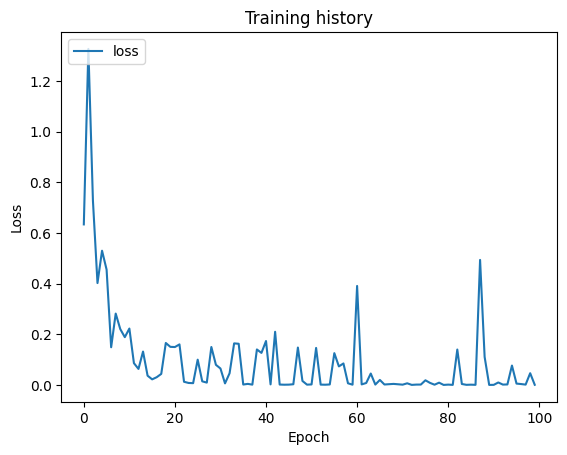

In [60]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

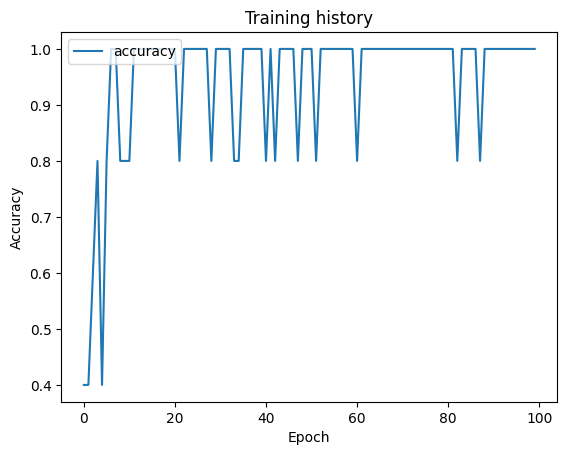

In [61]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

In [63]:
# Use the model to make predictions on new data
new_texts = [
    "The cat sat on the mat",
    "The dog chased the mouse",
    "The mouse ran up the clock",
    "The cat chased the dog"
]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_seq_length)
new_padded_sequences = np.reshape(new_padded_sequences, (len(new_texts), max_seq_length, 1))
predictions = model.predict(new_padded_sequences)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
[[6.0567528e-04]
 [9.9984360e-01]
 [1.2723065e-05]
 [4.5422913e-04]]


<br></br>
### <b>2.3. LSTM</b>

In [69]:
model = Sequential()
model.add(Masking(mask_value=0.0))
model.add(LSTM(units=256, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(units=256, dropout=0.1, recurrent_dropout=0.2, input_shape=(5, 1)))
model.add(Dense(units=1, activation='sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(padded_sequences, labels, epochs=100, batch_size=2, verbose=0)

# Evaluate the model on the training data
loss, acc = model.evaluate(padded_sequences, labels)
print("Training loss:", loss)
print("Training accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 1.0000 - loss: 9.3657e-04
Training loss: 0.0009365727892145514
Training accuracy: 1.0


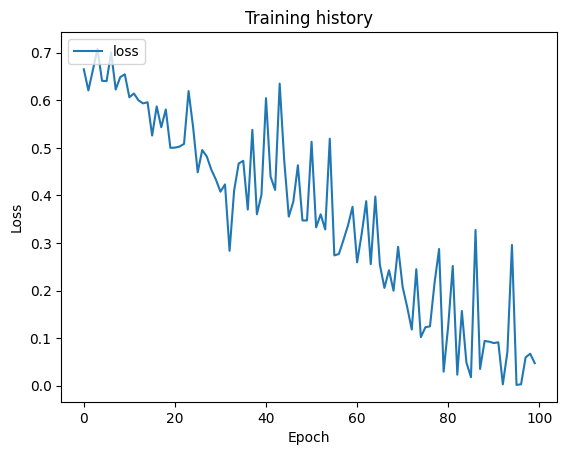

In [70]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

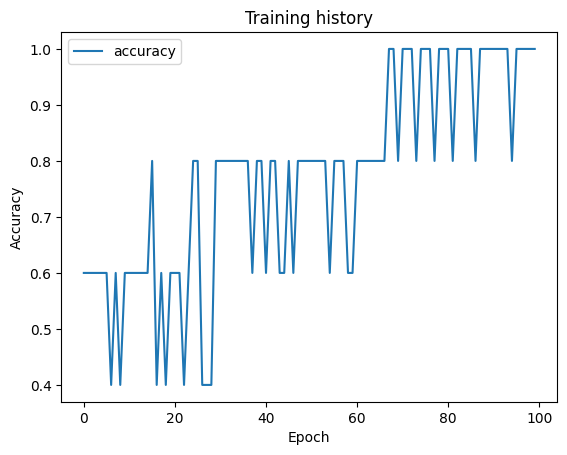

In [71]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

In [72]:
# Use the model to make predictions on new data
new_texts = [
    "The cat sat on the mat",
    "The dog chased the mouse",
    "The mouse ran up the clock",
    "The cat chased the dog"
]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_seq_length)
new_padded_sequences = np.reshape(new_padded_sequences, (len(new_texts), max_seq_length, 1))
predictions = model.predict(new_padded_sequences)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
[[6.2968849e-07]
 [9.4112730e-01]
 [5.7146883e-07]
 [8.9878083e-04]]


<br></br>
### <b>2.4. GRU</b>

In [73]:
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(max_seq_length, 1)))
model.add(GRU(units=256, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(units=256, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(padded_sequences, labels, epochs=100, batch_size=2, verbose=0)

# Evaluate the model on the training data
loss, acc = model.evaluate(padded_sequences, labels)
print("Training loss:", loss)
print("Training accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 1.0000 - loss: 0.0054
Training loss: 0.005424021277576685
Training accuracy: 1.0


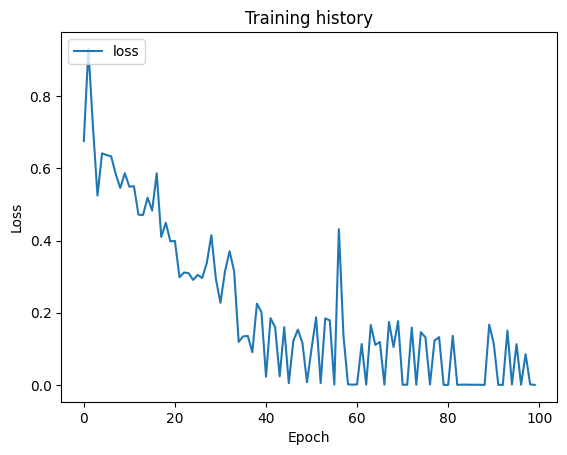

In [74]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

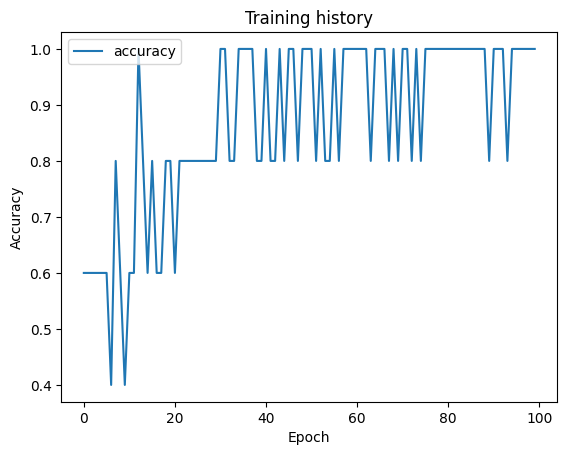

In [75]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

In [76]:
# Use the model to make predictions on new data
new_texts = [
    "The cat sat on the mat",
    "The dog chased the mouse",
    "The mouse ran up the clock",
    "The cat chased the dog"
]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_seq_length)
new_padded_sequences = np.reshape(new_padded_sequences, (len(new_texts), max_seq_length, 1))
predictions = model.predict(new_padded_sequences)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
[[1.5281955e-06]
 [6.9426847e-01]
 [5.0478150e-07]
 [1.3286849e-04]]


<br></br>
## <b>3. RNN and Process Mining</b>

### <b>3.1. Simple example</b>

In [11]:
# Define the event log as a list of cases, where each case is a list of activities
event_log = [
    ['A', 'B', 'C', 'D'],
    ['A', 'C', 'D', 'E'],
    ['B', 'D', 'E', 'F'],
    ['B', 'C', 'E', 'F', 'G']
]

# Create a list of all unique activities in the event log
activities = sorted(list(set([activity for case in event_log for activity in case])))

# Create a dictionary that maps each activity to a unique array
activity_to_index = {activity: [int(ind == index) for ind in range(len(activities))] for index, activity in enumerate(activities)}

# Convert each activity in the event log to its corresponding array
indexed_event_log = [[activity_to_index[activity] for activity in case] for case in event_log]

# Pad the indexed event_log to a fixed length
max_case_length = max([len(case) for case in indexed_event_log])
padded_sequences = pad_sequences(indexed_event_log, maxlen=max_case_length)

# Set labels
labels = np.array([0, 1, 0, 0])

In [12]:
padded_sequences.shape

(4, 5, 7)

<br></br>
#### <b>3.1.1.Vanilla RNN</b>

In [14]:
model = Sequential()
model.add(Masking(mask_value=0.0))
model.add(SimpleRNN(units=256, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
model.add(SimpleRNN(units=256, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(padded_sequences, labels, epochs=100, batch_size=2, verbose=0)

# Evaluate the model on the training data
loss, acc = model.evaluate(padded_sequences, labels)
print("Training loss:", loss)
print("Training accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 1.0000 - loss: 3.4331e-05
Training loss: 3.433075835346244e-05
Training accuracy: 1.0


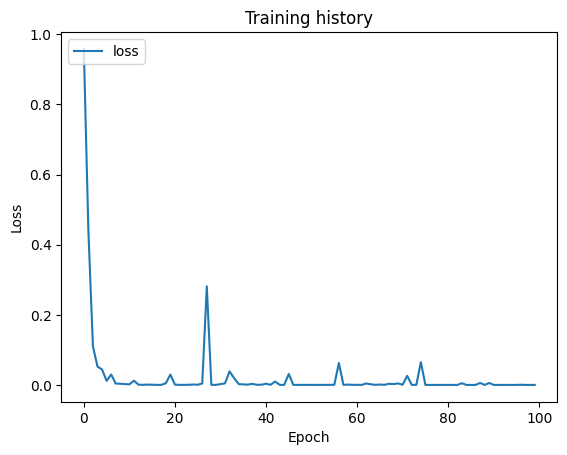

In [15]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

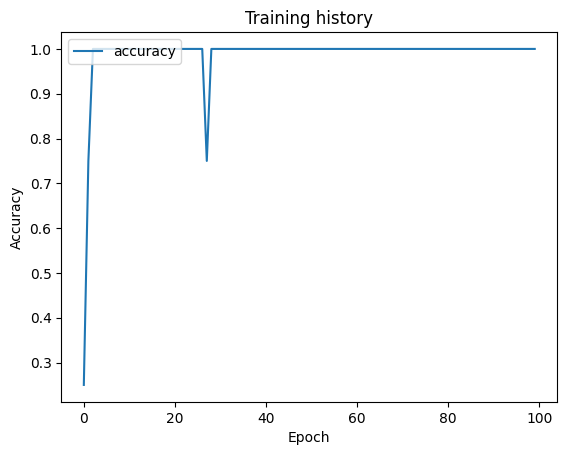

In [16]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

In [17]:
# Use the model to make predictions on new data
new_event_log = [
    ['A', 'B', 'C', 'D'],
    ['A', 'C', 'D', 'E'],
    ['B', 'D', 'C', 'F'],
    ['B', 'C', 'E', 'B']
]
new_sequences = [[activity_to_index[activity] for activity in case] for case in new_event_log]
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_case_length)
predictions = model.predict(new_padded_sequences)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
[[1.3621898e-04]
 [9.9999958e-01]
 [7.7328870e-08]
 [1.5711244e-05]]


<br></br>
#### <b>3.1.2. LSTM</b>

In [19]:
model = Sequential()
model.add(Masking(mask_value=0.0))
model.add(LSTM(units=256, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(units=256, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(padded_sequences, labels, epochs=100, batch_size=2, verbose=0)

# Evaluate the model on the training data
loss, acc = model.evaluate(padded_sequences, labels)
print("Training loss:", loss)
print("Training accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 1.0000 - loss: 0.0057
Training loss: 0.005737585946917534
Training accuracy: 1.0


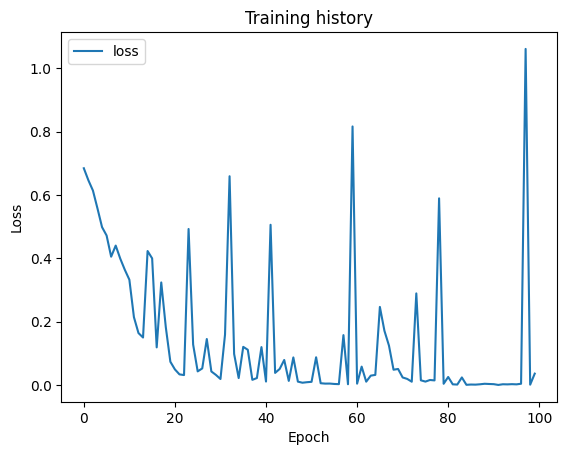

In [85]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

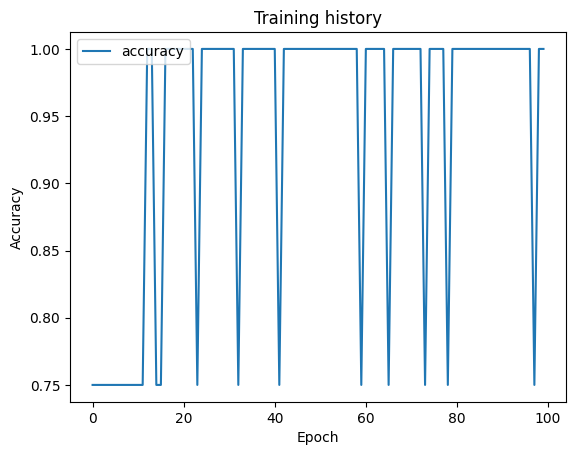

In [86]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

In [87]:
# Use the model to make predictions on new data
new_event_log = [
    ['A', 'B', 'C', 'D'],
    ['A', 'C', 'D', 'E'],
    ['B', 'D', 'C', 'F'],
    ['B', 'C', 'E', 'B']
]
new_sequences = [[activity_to_index[activity] for activity in case] for case in new_event_log]
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_case_length)
predictions = model.predict(new_padded_sequences)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
[[1.7009742e-03]
 [9.7990334e-01]
 [1.4755491e-08]
 [1.0229235e-08]]


<br></br>
### <b>3.1.3. GRU</b>

In [20]:
model = Sequential()
model.add(Masking(mask_value=0.0))
model.add(GRU(units=256, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(units=256, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(padded_sequences, labels, epochs=100, batch_size=2, verbose=0)

# Evaluate the model on the training data
loss, acc = model.evaluate(padded_sequences, labels)
print("Training loss:", loss)
print("Training accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 1.0000 - loss: 0.0049
Training loss: 0.004883714485913515
Training accuracy: 1.0


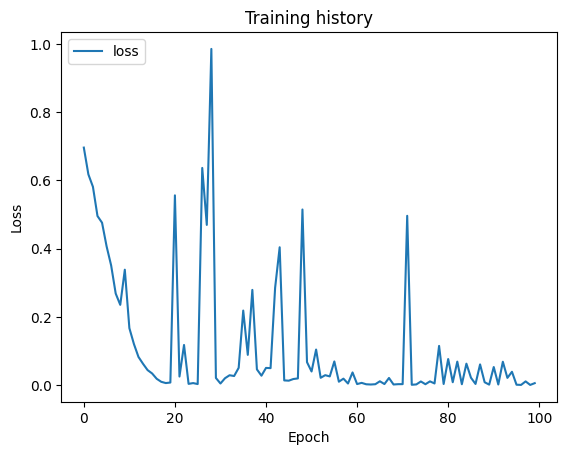

In [89]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

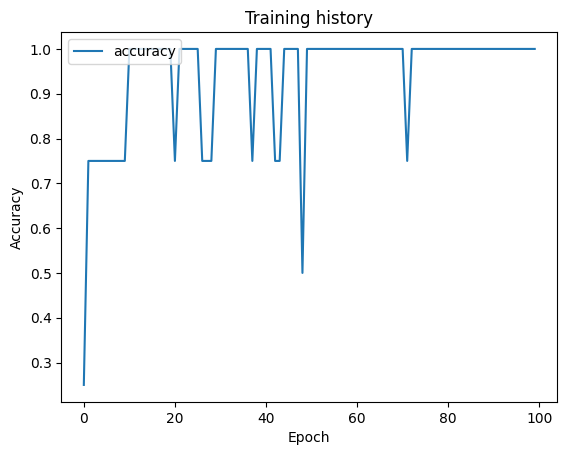

In [90]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

In [91]:
# Use the model to make predictions on new data
new_event_log = [
    ['A', 'B', 'C', 'D'],
    ['A', 'C', 'D', 'E'],
    ['B', 'D', 'C', 'F'],
    ['B', 'C', 'E', 'B']
]
new_sequences = [[activity_to_index[activity] for activity in case] for case in new_event_log]
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_case_length)
predictions = model.predict(new_padded_sequences)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
[[1.1810487e-05]
 [9.9508852e-01]
 [1.0456662e-05]
 [4.4249714e-06]]


<br></br>
### <b>3.2. Next Activity Prediction</b>

#### <b>3.2.1. Feature engineering</b>

In [21]:
# Import Eventlog
event_log = pd.read_csv(SRC_DIR / 'Datasets' / 'Example' / 'Running_Example' / 'running-example.csv', sep=";")
event_log.head()

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara


In [36]:
# Change "timestamp" format
event_log['timestamp'] = pd.to_datetime(event_log['timestamp'])
event_log.sort_values(['case_id', 'timestamp'], inplace=True)
event_log.reset_index(drop=True, inplace=True)
event_log

,case_id,activity,timestamp,costs,resource,case_total_cost,total_spend,remain_cost
0,1,register request,2010-12-30 11:02:00+01:00,50,Pete,950.0,50,900.0
1,1,examine thoroughly,2010-12-31 10:06:00+01:00,400,Sue,950.0,450,500.0
2,1,check ticket,2011-01-05 15:12:00+01:00,100,Mike,950.0,550,400.0
3,1,decide,2011-01-06 11:18:00+01:00,200,Sara,950.0,750,200.0
4,1,reject request,2011-01-07 14:24:00+01:00,200,Pete,950.0,950,0.0
5,2,register request,2010-12-30 11:32:00+01:00,50,Mike,950.0,50,900.0
6,2,check ticket,2010-12-30 12:12:00+01:00,100,Mike,950.0,150,800.0
7,2,examine casually,2010-12-30 14:16:00+01:00,400,Sean,950.0,550,400.0
8,2,decide,2011-01-05 11:22:00+01:00,200,Sara,950.0,750,200.0
9,2,pay compensation,2011-01-08 12:05:00+01:00,200,Ellen,950.0,950,0.0


In [23]:
# Calculate case_total_cost, total_spend and total_spend
for name, case in event_log.groupby('case_id'):
    event_log.loc[event_log.case_id == name, 'case_total_cost'] = sum(case.costs)

event_log['total_spend'] = event_log.groupby('case_id')['costs'].cumsum()
event_log['remain_cost'] = event_log['case_total_cost'] - event_log['total_spend']

<br></br>
#### <b>3.2.2. Embedding EventLog</b>

In [40]:
# Group the DataFrame by column case_id
grouped = event_log.groupby('case_id')

# Convert the grouped DataFrame to a numpy array
case_activities = np.array([group['activity'].values for _, group in grouped], dtype=object)
case_resources = np.array([group['resource'].values for _, group in grouped], dtype=object)

# Create a list of all unique activities and resources in the event log
activities_list = sorted(set(event_log['activity']))
resources_list = sorted(set(event_log['resource']))

# Create a dictionary that maps each activity and resourse to a unique array
label_binarizer = LabelBinarizer()

activity_one_hot_array = label_binarizer.fit_transform(activities_list)
activity_one_hot_dict = dict(zip(activities_list, activity_one_hot_array))

resource_one_hot_array = label_binarizer.fit_transform(resources_list)
resource_one_hot_dict = dict(zip(resources_list, resource_one_hot_array))

# Convert each activity and resourse in the event log to its corresponding array
embedded_activity = [[activity_one_hot_dict[activity] for activity in case] for case in case_activities]
embedded_resource = [[resource_one_hot_dict[resource] for resource in case] for case in case_resources]

# Concatenate the two lists and indexed event log
embedded_eventlog = []
for case_activity, case_resource in zip(embedded_activity, embedded_resource):
    case_list = []
    for activity, resource in zip(case_activity, case_resource):
        case_list.append([*activity, *resource])
    embedded_eventlog.append(case_list)


embedded_eventlog

[[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0

<br></br>
#### <b>3.2.3. Create X and Y</b>

In [42]:
# Next Activity embeding
event_log.sort_values(["case_id", "timestamp"], inplace=True)
event_log.reset_index(drop=True, inplace=True)

event_log['next_activity'] = event_log.activity.shift(-1)
event_log.loc[event_log.case_id != event_log.case_id.shift(-1), 'next_activity'] = 'End'

case_next_activities = np.array([group['next_activity'].values for _, group in grouped], dtype=object)
next_activity_list = sorted(set(event_log['next_activity']))
next_activity_one_hot_array = label_binarizer.fit_transform(next_activity_list)
next_activity_one_hot_dict = dict(zip(next_activity_list, next_activity_one_hot_array))

embedded_next_activity = [[next_activity_one_hot_dict[activity] for activity in case] for case in case_next_activities]

In [51]:
X_dataset = []
Y_dataset = []

for case, target in zip(embedded_eventlog, embedded_next_activity):
    # Create States
    for i in range(len(case)):
        X_dataset.append(case[:i+1])
        Y_dataset.append(target[i])
    
Y_dataset = np.array(Y_dataset)

# Pad the indexed event_log to a fixed length
max_case_length = max([len(case) for case in embedded_eventlog])
X_dataset = pad_sequences(X_dataset, maxlen=max_case_length)

<br></br>
#### <b>3.2.4. Train LSTM model</b>

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, Y_dataset, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(Masking(mask_value=0.0))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=y_train.shape[1], activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=2, validation_split=0.2, verbose=1)

Epoch 1/100
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1110 - loss: 0.6847   WARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x7fac6869a170> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.1116 - loss: 0.6836 - val_accuracy: 0.1429 - val_loss: 0.6558
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2565 - loss: 0.6394 

In [101]:
# Evaluate the model on the training data
loss, acc = model.evaluate(X_test, y_test)
print("Training loss:", loss)
print("Training accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6667 - loss: 0.1781
Training loss: 0.17805179953575134
Training accuracy: 0.6666666865348816


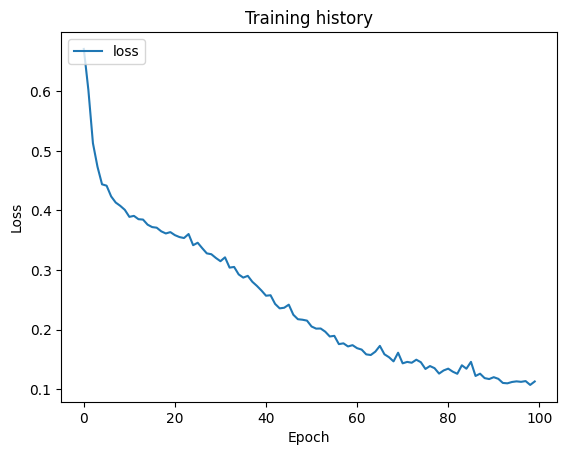

In [102]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

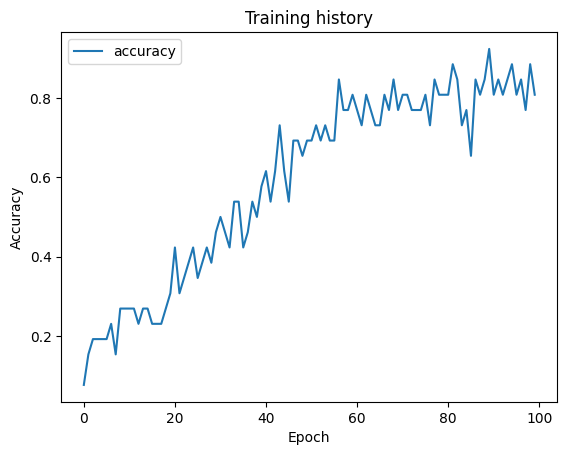

In [103]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

<br></br>
### <b>3.3. Remain Cost Prediction</b>

#### <b>3.3.1. Create X and Y datasets</b>

In [104]:
# Group the DataFrame by column case_id
grouped = event_log.groupby('case_id')

# Convert the grouped DataFrame to a numpy array
case_activities = np.array([grouped.get_group(x)['activity'].values for x in grouped.groups], dtype=object)
case_resources = np.array([grouped.get_group(x)['resource'].values for x in grouped.groups], dtype=object)
case_total_spend = np.array([grouped.get_group(x)['total_spend'].values for x in grouped.groups], dtype=object)


# Create a list of all unique activities and resources in the event log
activities = sorted(list(set([activity for case in case_activities for activity in case])))
resources = sorted(list(set([resource for case in case_resources for resource in case])))

# Create a dictionary that maps each activity and resourse to a unique array
activity_index = {activity: [int(ind == index) for ind in range(len(activities))] for index, activity in enumerate(activities)}
resource_index = {resource: [int(ind == index) for ind in range(len(resources))] for index, resource in enumerate(resources)}

# Convert each activity and resourse in the event log to its corresponding array
embedded_activity = [[activity_index[activity] for activity in case] for case in case_activities]
embedded_resource = [[resource_index[resource] for resource in case] for case in case_resources]

# Concatenate the two lists
embedded_eventlog = []
for case in zip(embedded_activity, embedded_resource, case_total_spend):
    case_list = []
    for activity, resource, total_spend in zip(case[0], case[1], case[2]):
        case_list.append(activity + resource + [total_spend])
    embedded_eventlog.append(case_list)
    
embedded_eventlog[1]

[[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 50],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 150],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 550],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 750],
 [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 950]]

In [105]:
# Create Y
event_log.sort_values(["case_id", "timestamp"], inplace=True)
event_log.reset_index(drop=True, inplace=True)

nextactivitycost = np.array([grouped.get_group(x)['case_total_cost'].values for x in grouped.groups], dtype=object)

X_dataset = []
Y_dataset = []

for case, target in zip(embedded_eventlog, nextactivitycost):
    for i in range(len(case)):
        X_dataset.append(case[:i+1])
        Y_dataset.append(target[i])
        
Y_dataset = np.array(Y_dataset)
max_case_length = max([len(case) for case in embedded_eventlog])
X_dataset = pad_sequences(X_dataset, maxlen=max_case_length)

In [106]:
X_dataset.shape

(42, 13, 15)

<br></br>
#### <b>3.3.2. Scale X and Y datasets</b>

In [107]:
# Reshape tensor
reshaped_tensor = np.reshape(X_dataset, (42 * 13, 15))

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the reshaped tensor
scaler.fit(reshaped_tensor)

# Transform the reshaped tensor with StandardScaler
transformed_reshaped_tensor = scaler.transform(reshaped_tensor)

# Reshape the transformed tensor back to its original shape
X_dataset = np.reshape(transformed_reshaped_tensor, (42, 13, 15))


# Reshape tensor
y_reshaped = Y_dataset.reshape(-1, 1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the reshaped 'y'
scaler.fit(y_reshaped)

# Transform the reshaped 'y' with StandardScaler
transformed_y = scaler.transform(y_reshaped)

# Reshape the transformed 'y' back to its original shape
Y_dataset = transformed_y.flatten()

#### 
### Train LSTM Model

In [109]:
import tensorflow.keras.backend as K

X_train, X_test, y_train, y_test = train_test_split(X_dataset, Y_dataset, test_size=0.2, random_state=42)

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))


# Define the LSTM model
model = Sequential()
model.add(Masking(mask_value=0.0))
model.add(LSTM(units=64, dropout=0.1, recurrent_dropout=0.1, return_sequences=True, activation='tanh'))
model.add(LSTM(units=64, dropout=0.1, recurrent_dropout=0.1, activation='tanh'))
model.add(Dense(units=1, activation='linear'))

# Compile the model with mean squared error loss
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[r_squared, 'mse'])

# Train the model using X_train and y_train
history = model.fit(X_train, y_train, batch_size=32, epochs=600, validation_data=(X_test, y_test), verbose=0)

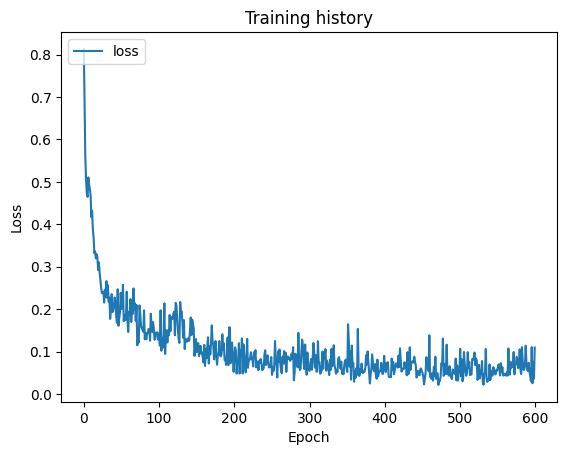

In [110]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

<br></br>
### <b>3.3. Recommender system</b>

#### <b>3.3.1. Filter activities</b>

In [3]:
# Import Eventlog
event_log = pd.read_csv(SRC_DIR / 'Datasets' / 'Real' / 'Customer_Journey' / 'Website_EventLog_Preprossed_With_Python.csv')

In [4]:
# Filter Activities based on duration
event_log = event_log.loc[event_log["Time_on_Page"] > 10]
event_log = event_log.loc[event_log["Time_on_Page"] <= 600]
event_log.reset_index(drop=True, inplace=True)

In [5]:
# Filter the event_log directly without creating an intermediate variable
event_log = event_log[event_log.groupby('User_ID')['Visited_Page'].transform('count') >= 3].reset_index(drop=True)
event_log.head()

,User_ID,Case_Start_Date,Activity_Start_Date,Browser,Operating_System,Device,Country,Visited_Page,Time_on_Page
0,U_5,12/29/2021 19:29:00,12/29/2021 19:30:46,B_3,OS_1,D_1,Iran,Page_0,94
1,U_5,12/29/2021 19:29:00,12/29/2021 19:33:00,B_3,OS_1,D_1,Iran,Page_3,205
2,U_5,12/29/2021 19:29:00,12/29/2021 19:36:25,B_3,OS_1,D_1,Iran,Page_4,156
3,U_5,12/29/2021 19:29:00,12/29/2021 19:39:01,B_3,OS_1,D_1,Iran,Page_5,134
4,U_5,12/29/2021 19:29:00,12/29/2021 19:41:15,B_3,OS_1,D_1,Iran,Page_6,40


In [6]:
event_log.head()

,User_ID,Case_Start_Date,Activity_Start_Date,Browser,Operating_System,Device,Country,Visited_Page,Time_on_Page
0,U_5,12/29/2021 19:29:00,12/29/2021 19:30:46,B_3,OS_1,D_1,Iran,Page_0,94
1,U_5,12/29/2021 19:29:00,12/29/2021 19:33:00,B_3,OS_1,D_1,Iran,Page_3,205
2,U_5,12/29/2021 19:29:00,12/29/2021 19:36:25,B_3,OS_1,D_1,Iran,Page_4,156
3,U_5,12/29/2021 19:29:00,12/29/2021 19:39:01,B_3,OS_1,D_1,Iran,Page_5,134
4,U_5,12/29/2021 19:29:00,12/29/2021 19:41:15,B_3,OS_1,D_1,Iran,Page_6,40


<br></br>
#### <b>3.3.2. Embedding EventLog</b>

In [7]:
# Group the DataFrame by column case_id
grouped = event_log.groupby('User_ID')

# Convert the grouped DataFrame to a numpy array
case_activities = np.array([grouped.get_group(x)['Visited_Page'].values for x in grouped.groups], dtype=object)
case_browser = np.array([grouped.get_group(x)['Browser'].values for x in grouped.groups], dtype=object)
case_OS = np.array([grouped.get_group(x)['Operating_System'].values for x in grouped.groups], dtype=object)
case_device = np.array([grouped.get_group(x)['Device'].values for x in grouped.groups], dtype=object)


# Create a list of all unique activities and other features
activities_list = sorted(event_log.Visited_Page.unique())
browser_list = sorted(event_log.Browser.unique())
OS_list = sorted(event_log.Operating_System.unique())
device_list = sorted(event_log.Device.unique())

# Create a dictionary that maps each features to a unique array
activity_index = {activity: [int(ind == index) for ind in range(len(activities_list))]
                  for index, activity in enumerate(activities_list)}

browser_index = {browser: [int(ind == index) for ind in range(len(browser_list))]
                 for index, browser in enumerate(browser_list)}

OS_index = {OS: [int(ind == index) for ind in range(len(OS_list))]
            for index, OS in enumerate(OS_list)}

device_index = {device: [int(ind == index) for ind in range(len(device_list))]
                for index, device in enumerate(device_list)}

# Convert each activity and resourse in the event log to its corresponding array
embedded_activity = [[activity_index[activity] for activity in case] for case in case_activities]
embedded_browser = [[browser_index[browser] for browser in case] for case in case_browser]
embedded_OS = [[OS_index[OS] for OS in case] for case in case_OS]
embedded_device = [[device_index[device] for device in case] for case in case_device]

# Concatenate the two lists and indexed event log
embedded_eventlog = []
for case in zip(embedded_activity, embedded_browser, embedded_OS, embedded_device):
    case_list = []
    for activity, browser, OS, device in zip(case[0], case[1], case[2], case[3]):
        case_list.append(activity + browser + OS + device)
    embedded_eventlog.append(case_list)

In [ ]:
event_log.sort_values(["User_ID", "User_ID"], inplace=True)
event_log.reset_index(drop=True, inplace=True)

event_log['next_activity'] = event_log.Visited_Page.shift(-1)
event_log.loc[event_log.User_ID != event_log.User_ID.shift(-1), 'next_activity'] = 'End'

case_next_activities = np.array([grouped.get_group(x)['next_activity'].values for x in grouped.groups], dtype=object)
next_activity_list = sorted(list(set([nextactivity for case in case_next_activities for nextactivity in case])))
next_activity_index = {nextactivity: [int(ind == index) for ind in range(len(next_activity_list))] for index, nextactivity in enumerate(next_activity_list)}
embedded_next_activity = [[next_activity_index[activity] for activity in case] for case in case_next_activities]

<br></br>
#### <b>3.3.3. Create X and Y</b>

In [8]:
X_dataset = []
Y_dataset = []

for case, target in zip(embedded_eventlog, embedded_next_activity):
    for i in range(len(case)):
        X_dataset.append(case[:i+1])
        Y_dataset.append(target[i])

Y_dataset = np.array(Y_dataset)

# Pad the indexed event_log to a fixed length
max_case_length = max([len(case) for case in embedded_eventlog])
X_dataset = pad_sequences(X_dataset, maxlen=max_case_length)

In [9]:
type(X_dataset)

numpy.ndarray

<br></br>
#### <b>3.3.4. Train LSTM model</b>

In [10]:
# Define the LSTM model
model = Sequential()
model.add(Masking(mask_value=0.0))
model.add(LSTM(units=64, dropout=0.1, recurrent_dropout=0.1, return_sequences=True))
model.add(LSTM(units=64, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(units=Y_dataset.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 200
batch_size = 500

# Fit the model to the training data
history = model.fit(X_dataset, Y_dataset, epochs=epochs, batch_size=batch_size, validation_split=0.15)

Epoch 1/200


2024-06-27 23:21:03.593745: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1347524904 exceeds 10% of free system memory.


24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 327ms/step - accuracy: 0.1323 - loss: 5.8870 - val_accuracy: 0.1934 - val_loss: 5.4907
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - accuracy: 0.1998 - loss: 5.2854 - val_accuracy: 0.1934 - val_loss: 4.9749
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 343ms/step - accuracy: 0.2072 - loss: 4.8268 - val_accuracy: 0.1934 - val_loss: 4.8607
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 306ms/step - accuracy: 0.2038 - loss: 4.7126 - val_accuracy: 0.1934 - val_loss: 4.8002
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - accuracy: 0.2020 - loss: 4.6464 - val_accuracy: 0.1934 - val_loss: 4.7697
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step - accuracy: 0.2041 - loss: 4.6187 - val_accuracy: 0.1934 - val_loss: 4.7421
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 317ms/step - accuracy: 0.2053 - loss: 4.5734 - val_accuracy: 0.1934 - val_loss: 4.7247
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - accuracy: 0.2019 - loss: 4.5577 - val_accuracy: 0.193

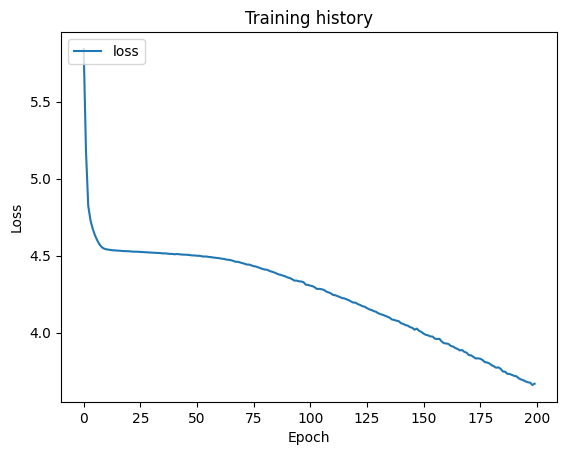

In [75]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

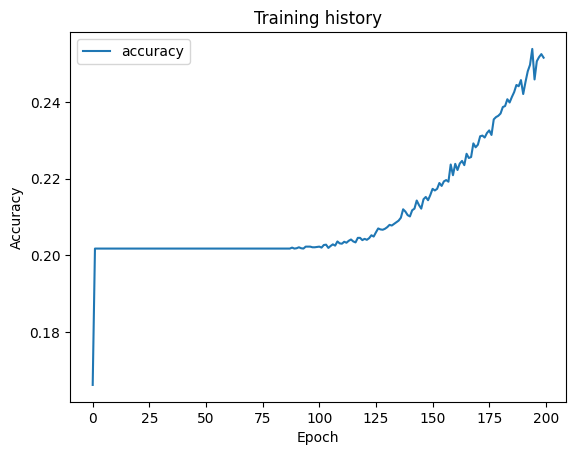

In [76]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

<br></br>
#### <b>3.3.5.Train GRU model</b>

In [72]:
# Define the LSTM model
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=X_train.shape[1:]))
model.add(GRU(units=256, dropout=0.1, recurrent_dropout=0.1, return_sequences=True))
model.add(GRU(units=128, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(units=y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 100
batch_size = 500

# Fit the model to the training data
history = model.fit(X_dataset, Y_dataset, epochs=epochs, batch_size=batch_size, validation_split=0.15)

Epoch 1/100
6/6 [==============================] - 8s 769ms/step - loss: 5.7716 - accuracy: 0.0962 - val_loss: 5.6476 - val_accuracy: 0.1284
Epoch 2/100
6/6 [==============================] - 4s 691ms/step - loss: 5.4873 - accuracy: 0.1368 - val_loss: 5.5147 - val_accuracy: 0.1284
Epoch 3/100
6/6 [==============================] - 4s 693ms/step - loss: 5.2328 - accuracy: 0.1368 - val_loss: 5.3844 - val_accuracy: 0.1284
Epoch 4/100
6/6 [==============================] - 4s 685ms/step - loss: 5.0750 - accuracy: 0.1368 - val_loss: 5.3174 - val_accuracy: 0.1284
Epoch 5/100
6/6 [==============================] - 4s 665ms/step - loss: 5.0168 - accuracy: 0.1368 - val_loss: 5.3698 - val_accuracy: 0.1284
Epoch 6/100
6/6 [==============================] - 5s 736ms/step - loss: 4.9945 - accuracy: 0.1368 - val_loss: 5.3770 - val_accuracy: 0.1284
Epoch 7/100
6/6 [==============================] - 5s 752ms/step - loss: 4.9604 - accuracy: 0.1368 - val_loss: 5.3286 - val_accuracy: 0.1284
Epoch 8/100
6

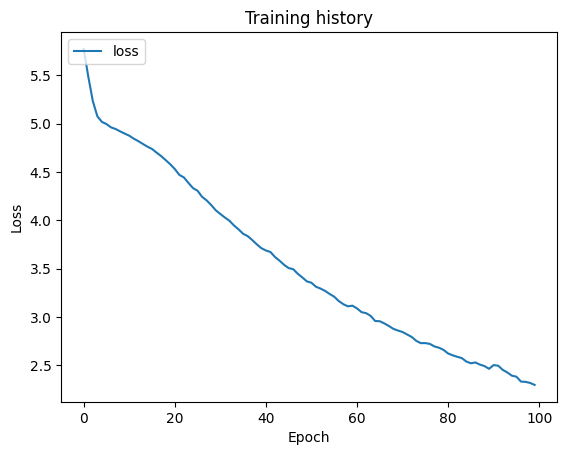

In [73]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

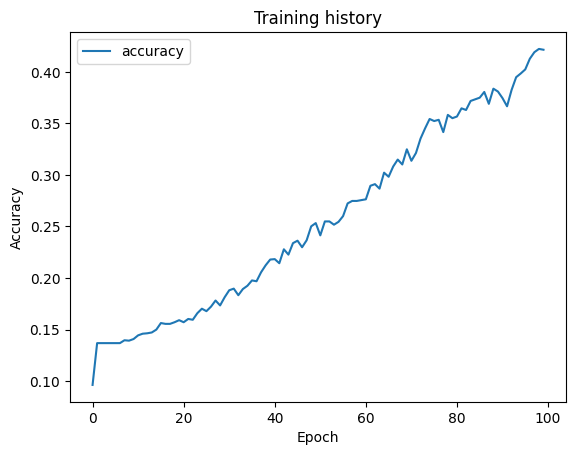

In [74]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()